In [1]:
# check prophet version
import prophet
# print version number
print('Prophet %s' % prophet.__version__)

Prophet 1.0


In [2]:
import pystan
pystan.__version__

'2.19.1.1'

In [3]:
# load the car sales dataset
from pandas import read_csv
# load data
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv'
df = read_csv(path, header=0)
# summarize shape
print(df.shape)
# show first few rows
print(df.tail())

(108, 2)
       Month  Sales
103  1968-08  16722
104  1968-09  14385
105  1968-10  21342
106  1968-11  17180
107  1968-12  14577


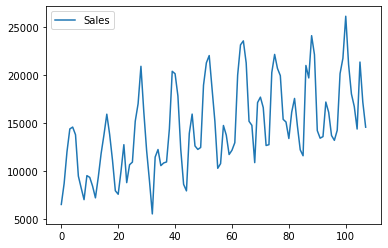

,Month,Sales
103,1968-08,16722
104,1968-09,14385
105,1968-10,21342
106,1968-11,17180
107,1968-12,14577


In [9]:
# load and plot the car sales dataset
from pandas import read_csv
from matplotlib import pyplot
# load data
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv'
df = read_csv(path, header=0)
# plot the time series
df.plot()
pyplot.show()
df.tail()

In [11]:
# fit prophet model on the car sales dataset
from pandas import read_csv
from pandas import to_datetime
from prophet import Prophet
# load data
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv'
df = read_csv(path, header=0)
# prepare expected column names
df.columns = ['ds', 'y']
df['ds']= to_datetime(df['ds'])
# define the model
model = Prophet()
# fit the model
model.fit(df)
df.tail()

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,y
103,1968-08-01,16722
104,1968-09-01,14385
105,1968-10-01,21342
106,1968-11-01,17180
107,1968-12-01,14577


In [6]:
# make an in-sample forecast
from pandas import read_csv
from pandas import to_datetime
from pandas import DataFrame
from prophet import Prophet
from matplotlib import pyplot
# load data
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv'
df = read_csv(path, header=0)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


          ds          yhat    yhat_lower    yhat_upper
0 1968-01-01  14344.429315  12809.555710  15930.187981
1 1968-02-01  14911.718770  13324.903142  16459.749803
2 1968-03-01  20859.142961  19298.203918  22475.592305
3 1968-04-01  22883.352978  21390.371555  24371.044596
4 1968-05-01  24183.139264  22593.315395  25745.777776


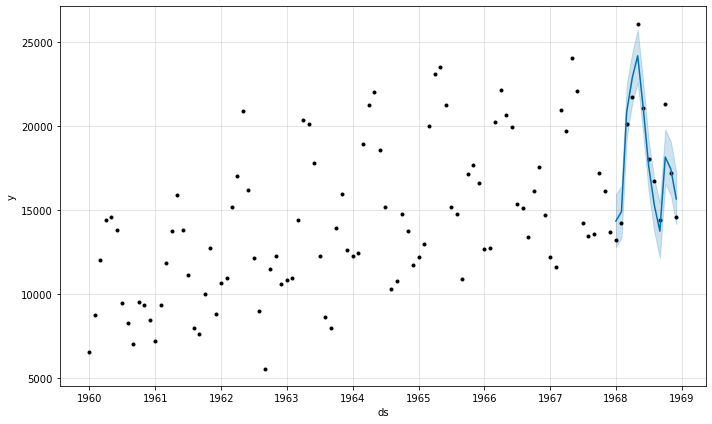

In [7]:
# prepare expected column names
df.columns = ['ds', 'y']
df['ds']= to_datetime(df['ds'])
# define the model
model = Prophet()
# fit the model
model.fit(df)
# define the period for which we want a prediction
future = list()
for i in range(1, 13):
	date = '1968-%02d' % i
	future.append([date])
future = DataFrame(future)
future.columns = ['ds']
future['ds']= to_datetime(future['ds'])
# use the model to make a forecast
forecast = model.predict(future)
# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
# plot forecast
model.plot(forecast)
pyplot.show()